In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import os

In [11]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage")

In [12]:
d10LVM_LRTable_file = "LshCas13a_d10LVM/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"
EcC3000_5_min_LRTable_file = "LshCas13a_5_min/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"
EcC3000_M13_LRTable_file = "LshCas13a_M13_infection/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"
in_vitro_total_RNA_file = "LshCas13a_in_vitro_total_RNA/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"
EcC3000_60_min_LRTable_file = "LshCas13a_C3000/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv"

In [13]:
d10LVM_LRTable = pd.read_csv(d10LVM_LRTable_file, sep="\t")
d10LVM_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_5_min_LRTable = pd.read_csv(EcC3000_5_min_LRTable_file, sep="\t")
EcC3000_5_min_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_M13_LRTable = pd.read_csv(EcC3000_M13_LRTable_file, sep="\t")
EcC3000_M13_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

in_vitro_total_RNA = pd.read_csv(in_vitro_total_RNA_file, sep="\t")
in_vitro_total_RNA.sort_values(by="PValue.adj", ascending=True, inplace=True)

EcC3000_60_min_LRTable = pd.read_csv(EcC3000_60_min_LRTable_file, sep="\t")
EcC3000_60_min_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

In [14]:
top_N = 100
logFC_cutoff = 4

In [15]:
def build_TCS_set(tcs_df, top_n_cutoff, logfc_cutoff):
    TCS_list = ["_".join([str(i[0]), i[1]])
                for i in zip(tcs_df.query(f"logFC > {logFC_cutoff}").head(top_n_cutoff)["Pos"].tolist(),
                             tcs_df.query(f"logFC > {logFC_cutoff}").head(top_n_cutoff)["Strand"].tolist())]
    TCS_set = set(TCS_list)
    return(TCS_set)

In [16]:
d10LVM_LRTable_set = build_TCS_set(tcs_df=d10LVM_LRTable, top_n_cutoff=top_N, logfc_cutoff=logFC_cutoff)
EcC3000_5_min_set = build_TCS_set(tcs_df=EcC3000_5_min_LRTable, top_n_cutoff=top_N, logfc_cutoff=logFC_cutoff)
EcC3000_M13_set = build_TCS_set(tcs_df=EcC3000_M13_LRTable, top_n_cutoff=top_N, logfc_cutoff=logFC_cutoff)
in_vitro_total_RNA_set = build_TCS_set(tcs_df=in_vitro_total_RNA, top_n_cutoff=top_N, logfc_cutoff=logFC_cutoff)
EcC3000_60_min_set = build_TCS_set(tcs_df=EcC3000_60_min_LRTable, top_n_cutoff=top_N, logfc_cutoff=logFC_cutoff)

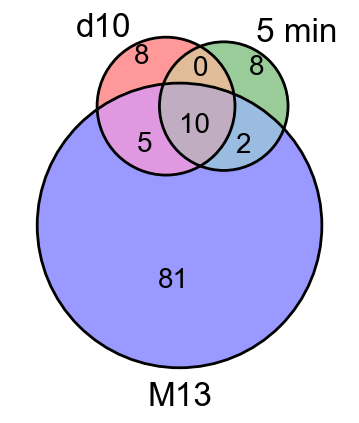

In [17]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,5))

venn_plot = venn3(subsets=[d10LVM_LRTable_set, EcC3000_5_min_set, EcC3000_M13_set],
                 set_labels=["d10", "5 min", "M13"])
venn_circles = venn3_circles(subsets=[d10LVM_LRTable_set, EcC3000_5_min_set, EcC3000_M13_set])

figure.savefig("TCS_intersection/Results/Pictures/venn3_plot.png")

In [18]:
from functools import reduce

In [19]:
df_list = [d10LVM_LRTable.loc[d10LVM_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]],
          EcC3000_5_min_LRTable.loc[EcC3000_5_min_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]],
          EcC3000_M13_LRTable.loc[EcC3000_M13_LRTable.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]], 
          in_vitro_total_RNA.loc[in_vitro_total_RNA.head(top_N).index][["SeqID", "Pos", "Strand", "MatchedFeatureType", "MatchedFeatureGene"]]]
MergedDFs = reduce(lambda left, right: pd.merge(left, right, how="inner", on = ["SeqID", "Pos", "Strand"]), df_list)
MergedDFs

/tmp/ipykernel_23129/457256164.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MatchedFeatureType_x', 'MatchedFeatureGene_x'} in the result is deprecated and will raise a MergeError in a future version.
  MergedDFs = reduce(lambda left, right: pd.merge(left, right, how="inner", on = ["SeqID", "Pos", "Strand"]), df_list)


,SeqID,Pos,Strand,MatchedFeatureType_x,MatchedFeatureGene_x,MatchedFeatureType_y,MatchedFeatureGene_y,MatchedFeatureType_x,MatchedFeatureGene_x,MatchedFeatureType_y,MatchedFeatureGene_y
0,NC_000913.3,4209809,+,tRNA,gltV,tRNA,gltV,tRNA,gltV,tRNA,gltV
1,NC_000913.3,780588,+,tRNA,lysT,tRNA,lysT,tRNA,lysT,tRNA,lysT
2,NC_000913.3,4175421,+,tRNA,thrU,tRNA,thrU,tRNA,thrU,tRNA,thrU
3,NC_000913.3,3943470,+,tRNA,gltU,tRNA,gltU,tRNA,gltU,tRNA,gltU
4,NC_000913.3,781403,+,tRNA,lysZ,tRNA,lysZ,tRNA,lysZ,tRNA,lysZ
5,NC_000913.3,4168407,+,tRNA,gltT,tRNA,gltT,tRNA,gltT,tRNA,gltT
6,NC_000913.3,4175422,+,tRNA,thrU,tRNA,thrU,tRNA,thrU,tRNA,thrU
7,NC_000913.3,780877,+,tRNA,lysW,tRNA,lysW,tRNA,lysW,tRNA,lysW
8,NC_000913.3,781181,+,tRNA,lysY,tRNA,lysY,tRNA,lysY,tRNA,lysY


In [20]:
#TODO: add intersection with in vitro data and WT
#venn4?? venn5?

from venn import venn

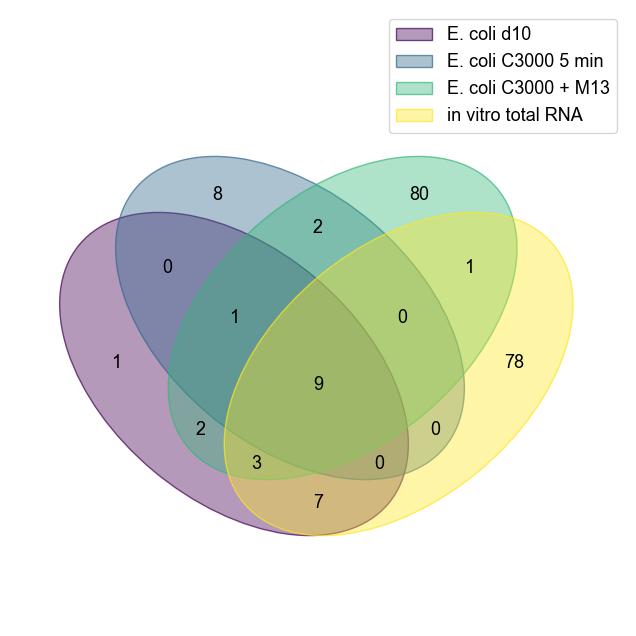

In [22]:
dataset_dict = {"E. coli d10" : d10LVM_LRTable_set, 
                 "E. coli C3000 5 min": EcC3000_5_min_set, 
                 "E. coli C3000 + M13" : EcC3000_M13_set, 
                 "in vitro total RNA" : in_vitro_total_RNA_set}
venn(dataset_dict)

plt.savefig("TCS_intersection/Results/Pictures/venn4_plot.png")

In [23]:
from Bio import SeqIO

In [24]:
MG1655_annotation = "TCS_intersection/NC_000913.3.gbk"

In [25]:
def remove_redundant_tRNAs(annotation_gbk, tcs_df):
    annotation_record = SeqIO.read(annotation_gbk, format="genbank")
    tRNA_genes = [feature for feature in annotation_record.features if feature.type == "tRNA"]
    
    tRNA_genes_dict = {}
    for tRNA in tRNA_genes:
        tRNA_genes_dict[tRNA.qualifiers["gene"][0]] = str(tRNA.extract(annotation_record).seq)
    
    identical_tRNAs_dict = {}
    for name, seq in tRNA_genes_dict.items():
        identical_tRNAs_dict.setdefault(seq, set()).add(name)
    identical_tRNAs = [names for seq, names in identical_tRNAs_dict.items() if len(names) > 1]
    
    identical_tRNAs_common_name_dict = {}
    for tRNA_set in identical_tRNAs:
        suffix = "".join(sorted([s[-1] for s in tRNA_set]))
        for tRNA in tRNA_set:
            identical_tRNAs_common_name_dict[tRNA] = tRNA[0:3]+suffix
    
    tRNA_list_to_skip = []
    for tRNA_set in identical_tRNAs:
        tRNA_list = list(tRNA_set)
        top_tcs = tcs_df.query(f'MatchedFeatureGene in {tRNA_list}').sort_values(by="PValue.adj", ascending=True).iloc[:1]["MatchedFeatureGene"]
        if len(top_tcs) == 0:
            continue
        top_tRNA_gene = top_tcs.values[0]
        tRNA_list.remove(top_tRNA_gene)
        tRNA_list_to_skip.extend(tRNA_list)
    
    tcs_df_unique_tRNAs = tcs_df.drop(tcs_df.query(f'MatchedFeatureGene in {tRNA_list_to_skip}').index)
    
    for key, value in identical_tRNAs_common_name_dict.items():
        tcs_df_unique_tRNAs.loc[tcs_df_unique_tRNAs.MatchedFeatureGene == key, "MatchedFeatureGene"] = value
        
    tcs_df_unique_tRNAs.sort_values(by="PValue.adj", ascending=True, inplace=True)
    
    return(tcs_df_unique_tRNAs)

In [26]:
d10LVM_LRTable_unique_tRNAs = remove_redundant_tRNAs(annotation_gbk=MG1655_annotation, tcs_df=d10LVM_LRTable)
EcC3000_5_min_LRTable_unique_tRNAs = remove_redundant_tRNAs(annotation_gbk=MG1655_annotation, tcs_df=EcC3000_5_min_LRTable)
EcC3000_M13_LRTable_unique_tRNAs = remove_redundant_tRNAs(annotation_gbk=MG1655_annotation, tcs_df=EcC3000_M13_LRTable)
in_vitro_total_RNA_unique_tRNAs = remove_redundant_tRNAs(annotation_gbk=MG1655_annotation, tcs_df=in_vitro_total_RNA)
EcC3000_60_min_LRTable_unique_tRNAs = remove_redundant_tRNAs(annotation_gbk=MG1655_annotation, tcs_df=EcC3000_60_min_LRTable)

In [27]:
d10LVM_LRTable_unique_tRNAs

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj,MatchedFeatureType,MatchedFeatureID,MatchedFeatureGene,MatchedFeatureDescription,MatchedFeatureStart,MatchedFeatureEnd,MatchedFeatureStrand
0,NC_000913.3,4209809,+,5.483975,6.768572,3.163426e+02,9.069207e-71,1.251279e-66,tRNA,rna166,gltTUVW,tRNA-Glu,4209774,4209849,+
1,NC_000913.3,696583,-,7.074547,7.090724,3.021813e+02,1.102929e-67,7.608552e-64,tRNA,rna17,glnVX,tRNA-Gln,696542,696616,-
2,NC_000913.3,780588,+,5.513677,7.602238,2.951111e+02,3.827534e-66,1.760283e-62,tRNA,rna23,lysQTVWYZ,tRNA-Lys,780554,780629,+
3,NC_000913.3,4175421,+,6.911892,9.542517,2.905924e+02,3.693817e-65,1.274090e-61,tRNA,rna160,thrU,tRNA-Thr,4175388,4175463,+
8,NC_000913.3,696797,-,5.117589,7.034949,2.480748e+02,6.825886e-56,1.046408e-52,tRNA,rna19,glnUW,tRNA-Gln,696756,696830,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,NC_000913.3,228342,+,-0.000387,4.443654,1.923535e-06,9.988934e-01,9.991375e-01,rRNA,rna6,rrlH,23S ribosomal RNA,225759,228662,+
12209,NC_000913.3,3447453,-,-0.000403,7.402701,2.068048e-06,9.988526e-01,9.991375e-01,CDS,cds3286,rplX,50S ribosomal subunit protein L24,3447453,3447767,-
12210,NC_000913.3,3943928,+,-0.000060,7.068476,8.730269e-08,9.997642e-01,9.997642e-01,rRNA,rna137,rrlC,23S ribosomal RNA,3943704,3946607,+
12211,NC_000913.3,4210268,+,-0.000064,6.454073,8.917991e-08,9.997617e-01,9.997642e-01,rRNA,rna167,rrlE,23S ribosomal RNA,4210043,4212946,+


In [35]:
top_N = 100
logFC_cutoff = 4

In [48]:
def build_TCS_genes_set(tcs_df, top_n_cutoff, logfc_cutoff):
    #TCS_list = tcs_df.query(f"logFC >= {logFC_cutoff} and MatchedFeatureType == 'tRNA'").head(top_n_cutoff)["MatchedFeatureGene"].tolist()
    TCS_list = tcs_df.query(f"logFC >= {logFC_cutoff} and MatchedFeatureType == 'tRNA'").head(top_n_cutoff)["MatchedFeatureGene"].tolist()
    TCS_set = set(TCS_list)
    return(TCS_set)

In [49]:
d10LVM_LRTable_unique_tRNAs_set = build_TCS_genes_set(d10LVM_LRTable_unique_tRNAs, top_N, logFC_cutoff)
EcC3000_5_min_LRTable_unique_tRNAs_set = build_TCS_genes_set(EcC3000_5_min_LRTable_unique_tRNAs, top_N, logFC_cutoff)
EcC3000_M13_LRTable_unique_tRNAs_set = build_TCS_genes_set(EcC3000_M13_LRTable_unique_tRNAs, top_N, logFC_cutoff)
in_vitro_total_RNA_unique_tRNAs_set = build_TCS_genes_set(in_vitro_total_RNA_unique_tRNAs, top_N, logFC_cutoff)
EcC3000_60_min_LRTable_unique_tRNAs_set = build_TCS_genes_set(EcC3000_60_min_LRTable_unique_tRNAs, top_N, logFC_cutoff)

In [50]:
d10LVM_LRTable_unique_tRNAs_set

{'glnUW', 'glnVX', 'gltTUVW', 'glyT', 'hisR', 'lysQTVWYZ', 'thrU', 'valTUXYZ'}

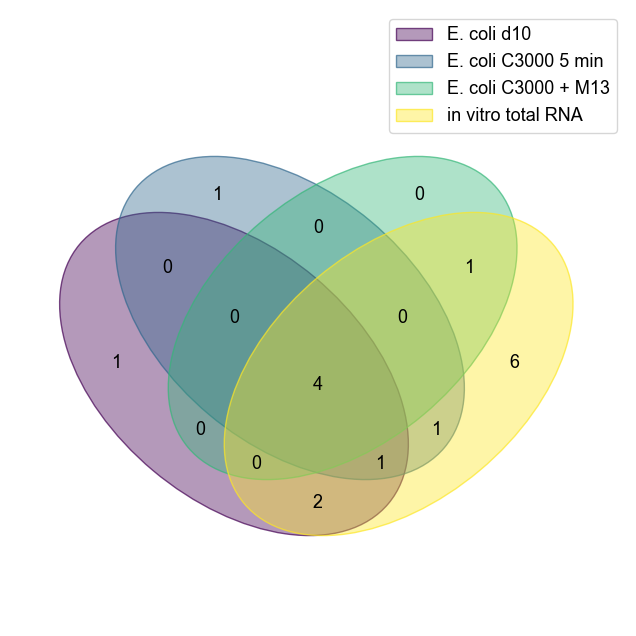

In [51]:
dataset_dict = {"E. coli d10" : d10LVM_LRTable_unique_tRNAs_set, 
                 "E. coli C3000 5 min": EcC3000_5_min_LRTable_unique_tRNAs_set, 
                 "E. coli C3000 + M13" : EcC3000_M13_LRTable_unique_tRNAs_set, 
                 "in vitro total RNA" : in_vitro_total_RNA_unique_tRNAs_set}
venn(dataset_dict)

plt.savefig("TCS_intersection/Results/Pictures/venn4_plot_unique_tRNAs.png")

In [52]:
print(set.intersection(d10LVM_LRTable_unique_tRNAs_set, 
                 EcC3000_5_min_LRTable_unique_tRNAs_set, 
                 EcC3000_M13_LRTable_unique_tRNAs_set, 
                 in_vitro_total_RNA_unique_tRNAs_set))

{'thrU', 'glnUW', 'lysQTVWYZ', 'gltTUVW'}
